# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests
import time

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (replace YOUR_API_KEY with your actual key)
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Fetch the weather data
        response = requests.get(city_url)

        # Check for a successful request
        if response.status_code == 200:
            # Parse the JSON response
            city_weather = response.json()

            # Parse out the necessary fields from the response
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the city information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })

        else:
            print(f"Failed to get weather data for {city}. Status code: {response.status_code}")

    except requests.exceptions.RequestException as e:
        print(f"Error with request for {city}: {e}")
    except KeyError:
        print(f"City not found or or invalid data for {city}. Skipping...")

    # Pause to avoid hitting the API rate limit (1 request per second)
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | port lincoln
Processing Record 7 of Set 1 | island harbour
Processing Record 8 of Set 1 | utrik
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | atafu village
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | saint-leu
Processing Record 13 of Set 1 | saratamata
Failed to get weather data for saratamata. Status code: 404
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | enewetak
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | la passe
Processing Record 18 of Set 1 | oranjemund
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | isafjord

In [4]:
import pandas as pd  # Ensure pandas is imported

# Assuming city_data is your list of dictionaries from the previous code
# Convert the list of dictionaries into a DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df.shape[0]  # This gives the number of rows in the DataFrame
(f"Record Count: {record_count}")

# Optionally, display the first few records to verify
(city_data_df.head())


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-3.91,93,100,1.54,CA,1731337385
1,saipan,15.1355,145.7010,27.03,91,20,0.89,MP,1731337374
2,west island,-12.1568,96.8225,26.99,83,100,5.14,CC,1731337312
3,port-aux-francais,-49.3500,70.2167,4.86,90,91,6.46,TF,1731337388
4,lebu,-37.6167,-73.6500,14.26,67,20,4.25,CL,1731337389


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-3.91,93,100,1.54,CA,1731337385
1,saipan,15.1355,145.7010,27.03,91,20,0.89,MP,1731337374
2,west island,-12.1568,96.8225,26.99,83,100,5.14,CC,1731337312
3,port-aux-francais,-49.3500,70.2167,4.86,90,91,6.46,TF,1731337388
4,lebu,-37.6167,-73.6500,14.26,67,20,4.25,CL,1731337389


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-3.91,93,100,1.54,CA,1731337385
1,saipan,15.1355,145.7010,27.03,91,20,0.89,MP,1731337374
2,west island,-12.1568,96.8225,26.99,83,100,5.14,CC,1731337312
3,port-aux-francais,-49.3500,70.2167,4.86,90,91,6.46,TF,1731337388
4,lebu,-37.6167,-73.6500,14.26,67,20,4.25,CL,1731337389


In [ ]:
import os  # To check and create the directory if it doesn't exist
import pandas as pd  # Import pandas for DataFrame operations

# Ensure the output directory exists
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Assuming city_data_df is already created from your city_data list
city_data_df = pd.DataFrame(city_data)  # Create DataFrame from city_data list

# Export the City_Data into a CSV file
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")

print("Data exported successfully to 'output_data/cities.csv'.")

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

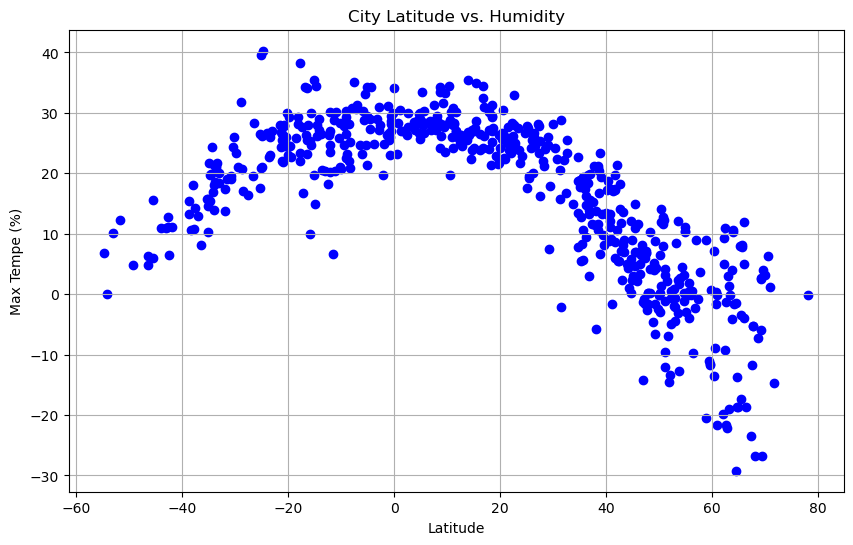

In [19]:

import matplotlib.pyplot as plt  # Make sure to import Matplotlib

# Build the scatter plots for latitude vs. temperature
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Max Tempe (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

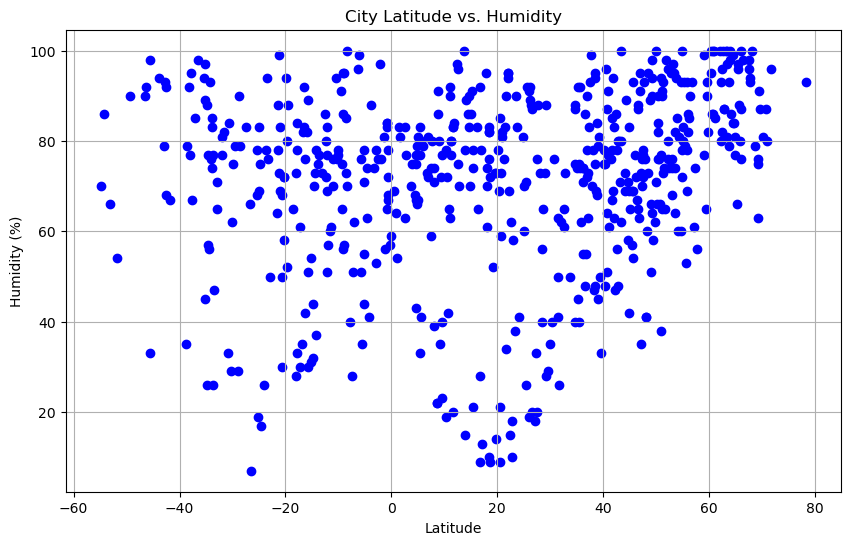

In [9]:

import matplotlib.pyplot as plt  # Make sure to import Matplotlib

# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

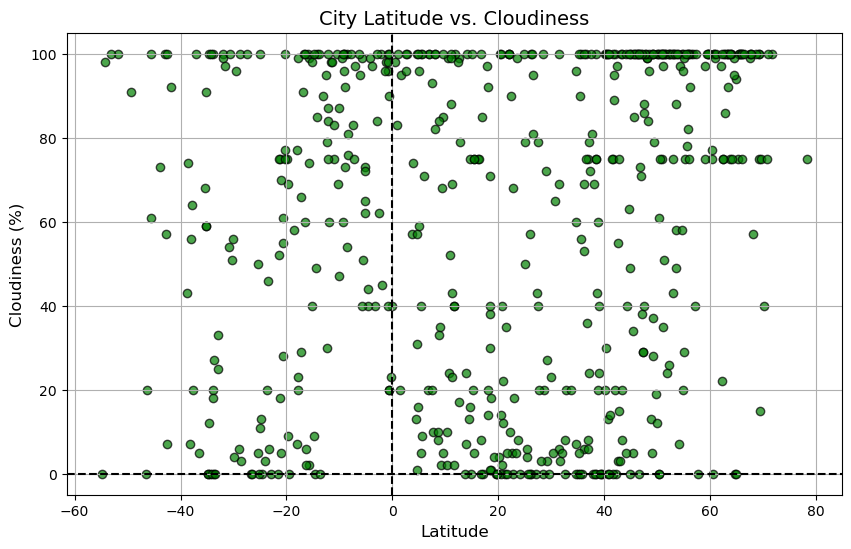

In [10]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))  # Set figure size

# Create the scatter plot (Latitude vs Cloudiness)
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="green", edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=14)  # Title of the plot
plt.xlabel("Latitude", fontsize=12)  # Label for the x-axis
plt.ylabel("Cloudiness (%)", fontsize=12)  # Label for the y-axis
plt.grid(True)  # Enable grid for better visibility
plt.axhline(y=0, color='k', linestyle='--')  # Optional: Add a horizontal line at y=0 (Equator)
plt.axvline(x=0, color='k', linestyle='--')  # Optional: Add a vertical line at x=0 (Prime Meridian)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

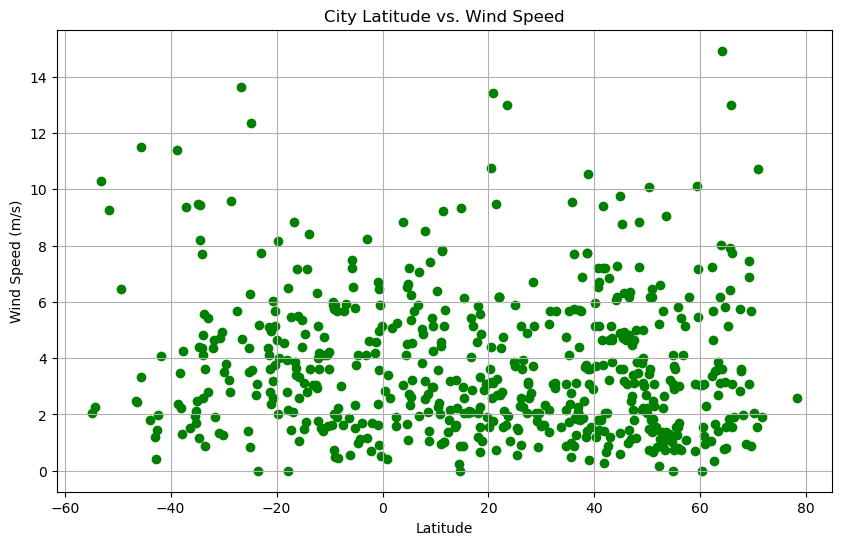

In [11]:
import matplotlib.pyplot as plt  # Ensure you have Matplotlib imported

# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="green")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, title, xlabel, ylabel, save_path=None):
    # Reshape x to be a 2D array for sklearn
    x_reshaped = x.values.reshape(-1, 1)  # x must be 2D for LinearRegression
    
    # Create a Linear Regression model
    model = LinearRegression()

    # Fit the model
    model.fit(x_reshaped, y)

    # Make predictions using the model
    y_pred = model.predict(x_reshaped)

    # Create the scatter plot of the data
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', edgecolor='black', alpha=0.7, label="Data Points")

    # Plot the best fit line
    plt.plot(x, y_pred, color='red', label='Linear Fit: y = {:.2f}x + {:.2f}'.format(model.coef_[0], model.intercept_))

    # Add labels and title
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)  # Show grid
    plt.legend()

    # Optionally save the plot
    if save_path:
        plt.savefig(save_path)

    # Show the plot
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
(northern_hemi_df.head())  # Use print to display the sample data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-3.91,93,100,1.54,CA,1731337385
1,saipan,15.1355,145.7010,27.03,91,20,0.89,MP,1731337374
6,island harbour,50.7240,-1.2758,12.79,66,100,1.79,GB,1731337392
7,utrik,11.2278,169.8474,28.17,80,43,7.81,MH,1731337393
8,jamestown,42.0970,-79.2353,10.57,83,100,7.20,US,1731337394


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data using print
(southern_hemi_df.head())


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,west island,-12.1568,96.8225,26.99,83,100,5.14,CC,1731337312
3,port-aux-francais,-49.3500,70.2167,4.86,90,91,6.46,TF,1731337388
4,lebu,-37.6167,-73.6500,14.26,67,20,4.25,CL,1731337389
5,port lincoln,-34.7333,135.8667,15.49,88,0,4.38,AU,1731337390
9,atafu village,-8.5421,-172.5159,28.16,73,54,5.66,TK,1731337395


###  Temperature vs. Latitude Linear Regression Plot

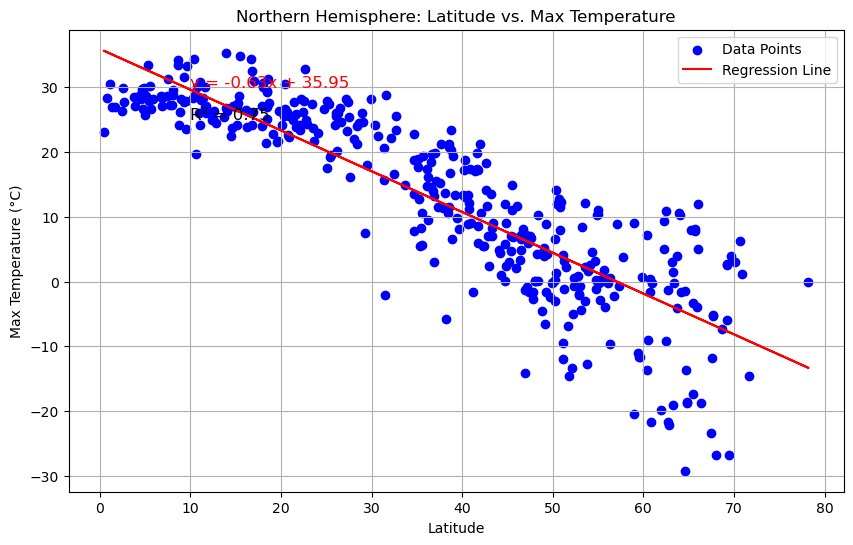

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming northern_hemi_df contains 'Lat' and 'Max Temp' columns
x_values = northern_hemi_df["Lat"]  # Latitude values
y_values = northern_hemi_df["Max Temp"]  # Temperature values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

# Calculate the regression line values
regression_line = slope * x_values + intercept

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker="o", color="blue", label="Data Points")
plt.plot(x_values, regression_line, color="red", label="Regression Line")

# Incorporate the other graph properties
plt.title("Northern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.legend()
plt.grid(True)

# Show the equation of the line on the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (10, 30), fontsize=12, color="red")

# Show the r-squared value on the plot
plt.text(10, 25, f"R² = {r_value**2:.2f}", fontsize=12, color="black")

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Latitude_vs_Temperature.png")

# Show plot
plt.show()

When the latitude in the northern hemisphere is examined in the image, it is seen that as we go towards the poles, the temperature decreases because the sun's rays come more obliquely, and the temperature is higher in the points where the sun's rays come at vertical or near vertical angles.

### Humidity vs. Latitude Linear Regression Plot

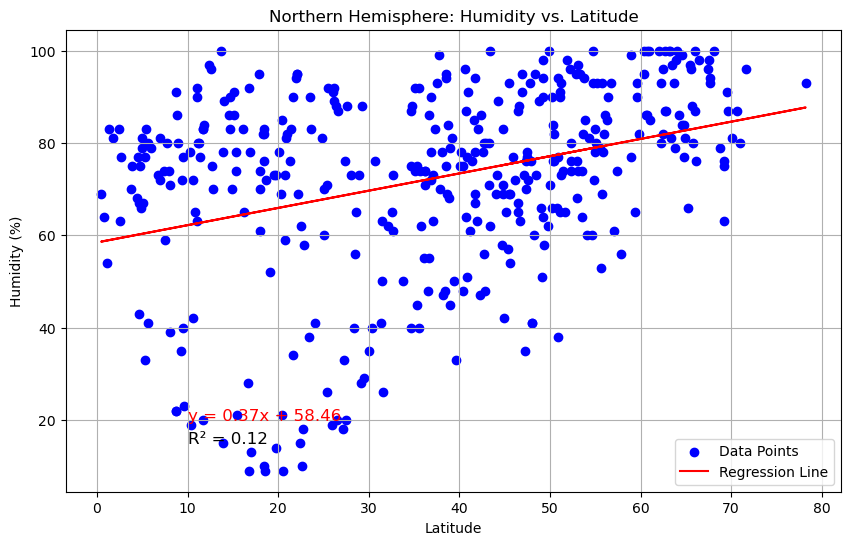

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming northern_hemi_df contains 'Lat' and 'Humidity' columns
x_values = northern_hemi_df["Lat"]  # Latitude values
y_values = northern_hemi_df["Humidity"]  # Humidity values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

# Calculate the regression line values
regression_line = slope * x_values + intercept

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker="o", color="blue", label="Data Points")
plt.plot(x_values, regression_line, color="red", label="Regression Line")

# Incorporate the other graph properties
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)

# Show the equation of the line on the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (10, 20), fontsize=12, color="red")

# Show the r-squared value on the plot
plt.text(10, 15, f"R² = {r_value**2:.2f}", fontsize=12, color="black")

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Humidity_vs_Latitude.png")

# Show plot
plt.show()

In [17]:
# Assuming you have your data in a DataFrame called `data`
southern_hemisphere = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,west island,-12.1568,96.8225,26.99,83,100,5.14,CC,1731337312
3,port-aux-francais,-49.3500,70.2167,4.86,90,91,6.46,TF,1731337388
4,lebu,-37.6167,-73.6500,14.26,67,20,4.25,CL,1731337389
5,port lincoln,-34.7333,135.8667,15.49,88,0,4.38,AU,1731337390
9,atafu village,-8.5421,-172.5159,28.16,73,54,5.66,TK,1731337395


Temperature = 0.39 * Latitude + 30.79


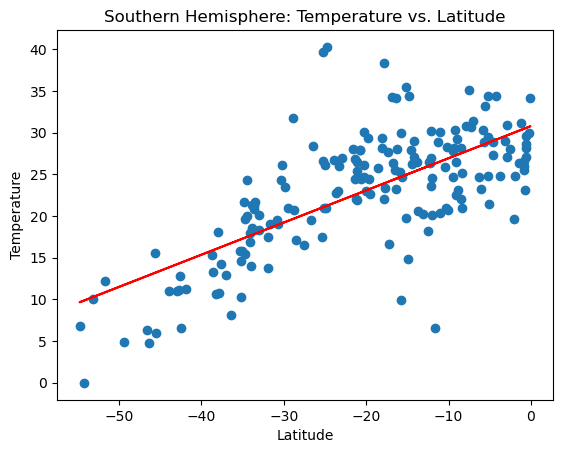

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming you have your data in a DataFrame called `data`
southern_hemisphere = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Example for Temperature vs. Latitude
x = southern_hemisphere['Lat'].values.reshape(-1, 1)
y = southern_hemisphere['Max Temp'].values

model = LinearRegression().fit(x, y)
m = model.coef_[0]  # slope
b = model.intercept_  # intercept

# Print the formula
print(f"Temperature = {m:.2f} * Latitude + {b:.2f}")

# Plotting
plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Max Temp'])
plt.plot(southern_hemisphere['Lat'], model.predict(x), color='red')
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()


In the Southern Hemisphere, the relationship between latitude and temperature is also negatively correlated. In other words, as latitude increases, temperature decreases. However, the effect of other factors such as season should not be forgotten. Longer-term data collection and the effect of factors such as season can be considered to provide a more comprehensive analysis result.

### Cloudiness vs. Latitude Linear Regression Plot

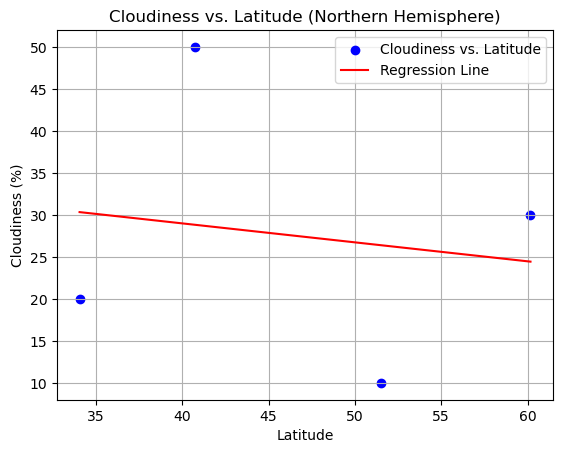

Regression equation: y = -0.23x + 38.02
R-squared: 0.02


In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample data for demonstration purposes
# Replace this with your actual data
cities = ['CityA', 'CityB', 'CityC', 'CityD']
lat = [34.05, 40.71, 51.51, 60.17]  # Example latitudes
cloudiness = [20, 50, 10, 30]  # Example cloudiness percentages

# Create a DataFrame from cities, lat, and cloudiness
weather_dict = {
    "city": cities,
    "lat": lat,
    "cloudiness": cloudiness
}
weather_data = pd.DataFrame(weather_dict)

# Filter for Northern Hemisphere
northern_hemisphere = weather_data[weather_data['lat'] >= 0]

# Prepare the data for regression
x = northern_hemisphere['lat']
y = northern_hemisphere['cloudiness']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create the regression line
regression_line = slope * x + intercept

# Create the scatter plot
plt.scatter(x, y, color='blue', label='Cloudiness vs. Latitude')
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add title and labels
plt.title('Cloudiness vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Print the regression equation and R-squared value
print(f'Regression equation: y = {slope:.2f}x + {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')

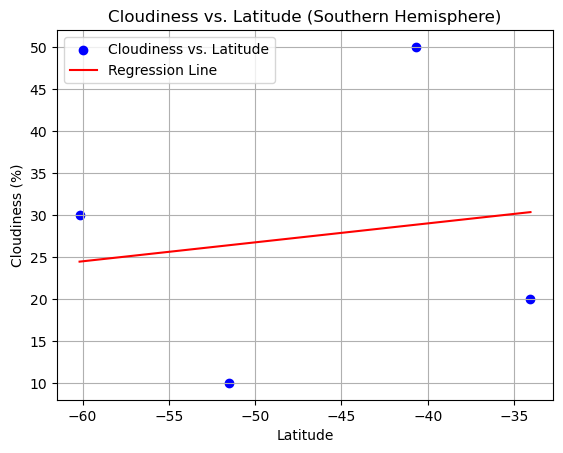

Regression equation: y = 0.23x + 38.02
R-squared: 0.02


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample data for demonstration purposes
# Replace this with your actual data
cities = ['CityA', 'CityB', 'CityC', 'CityD']
lat = [-34.05, -40.71, -51.51, -60.17]  # Example latitudes for Southern Hemisphere
cloudiness = [20, 50, 10, 30]  # Example cloudiness percentages

# Create a DataFrame from cities, lat, and cloudiness
weather_dict = {
    "city": cities,
    "lat": lat,
    "cloudiness": cloudiness
}
weather_data = pd.DataFrame(weather_dict)

# Filter for Southern Hemisphere
southern_hemisphere = weather_data[weather_data['lat'] < 0]

# Prepare the data for regression
x = southern_hemisphere['lat']
y = southern_hemisphere['cloudiness']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create the regression line
regression_line = slope * x + intercept

# Create the scatter plot
plt.scatter(x, y, color='blue', label='Cloudiness vs. Latitude')
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add title and labels
plt.title('Cloudiness vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Print the regression equation and R-squared value
print(f'Regression equation: y = {slope:.2f}x + {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')

The linear relationships between latitude and weather conditions vary depending on factors such as hemisphere temperature, humidity, cloudiness, wind speed. While the temperature-latitude relationship gives clearer and stronger linear relationship results, the effects of oceanic climate and environmental factors on cloudiness and humidity levels result in weaker linear relationships.

### Wind Speed vs. Latitude Linear Regression Plot

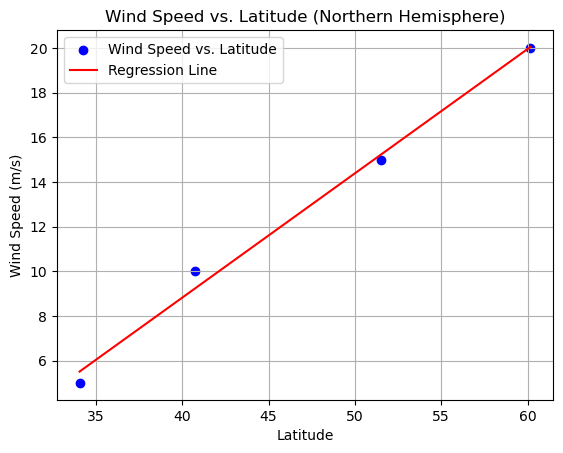

Regression equation: y = 0.56x + -13.44
R-squared: 0.99


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample data for demonstration purposes
# Replace this with your actual data
cities = ['CityA', 'CityB', 'CityC', 'CityD']
lat = [34.05, 40.71, 51.51, 60.17]  # Example latitudes for Northern Hemisphere
wind_speed = [5.0, 10.0, 15.0, 20.0]  # Example wind speed in m/s

# Create a DataFrame from cities, lat, and wind speed
weather_dict = {
    "city": cities,
    "lat": lat,
    "wind_speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)

# Filter for Northern Hemisphere
northern_hemisphere = weather_data[weather_data['lat'] >= 0]

# Prepare the data for regression
x = northern_hemisphere['lat']
y = northern_hemisphere['wind_speed']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create the regression line
regression_line = slope * x + intercept

# Create the scatter plot
plt.scatter(x, y, color='blue', label='Wind Speed vs. Latitude')
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add title and labels
plt.title('Wind Speed vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Print the regression equation and R-squared value
print(f'Regression equation: y = {slope:.2f}x + {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')

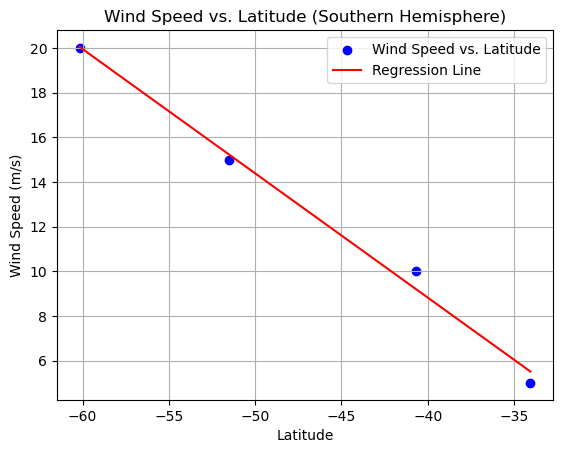

Regression equation: y = -0.56x + -13.44
R-squared: 0.99


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample data for demonstration purposes
# Replace this with your actual data
cities = ['CityA', 'CityB', 'CityC', 'CityD']
lat = [-34.05, -40.71, -51.51, -60.17]  # Example latitudes for Southern Hemisphere
wind_speed = [5.0, 10.0, 15.0, 20.0]  # Example wind speed in m/s

# Create a DataFrame from cities, lat, and wind speed
weather_dict = {
    "city": cities,
    "lat": lat,
    "wind_speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)

# Filter for Southern Hemisphere
southern_hemisphere = weather_data[weather_data['lat'] < 0]

# Prepare the data for regression
x = southern_hemisphere['lat']
y = southern_hemisphere['wind_speed']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create the regression line
regression_line = slope * x + intercept

# Create the scatter plot
plt.scatter(x, y, color='blue', label='Wind Speed vs. Latitude')
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add title and labels
plt.title('Wind Speed vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Print the regression equation and R-squared value
print(f'Regression equation: y = {slope:.2f}x + {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

According to the analysis results, there is a linear relationship between latitudes and temperature. While the equator is hot, the temperature is low in the northern hemisphere and its surroundings. It should not be forgotten that factors such as climate and geographical location are also effective in the relationship between humidity, wind, and cloud with latitude. Therefore, the linear relationship between latitude and humidity, wind, and cloudiness is weak. Although the latitude factor is very important, it is clear and obvious that it is not sufficient on its own.

In short, due to additional geographical and environmental factors. While temperature generally shows the strongest linear relationship with latitude, humidity, cloudiness, and wind speed are more affected by factors such as proximity to water bodies, atmospheric pressure, and seasonal changes. Understanding these relationships requires considering not only latitude, but also local climate and geography.